In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jax.numpy as jnp
jnp.trapz = jnp.trapezoid

import scanpy as sc
from matplotlib import rcParams

import snapseed as snap
from snapseed.utils import read_yaml

### R interface to load the tumor data
import anndata2ri
from rpy2.robjects import r

anndata2ri.activate()
%load_ext rpy2.ipython

sc.logging.print_versions()

During startup - Warning messages:
1: Setting LC_CTYPE failed, using "C" 
2: Setting LC_COLLATE failed, using "C" 
3: Setting LC_TIME failed, using "C" 
4: Setting LC_MESSAGES failed, using "C" 
5: Setting LC_MONETARY failed, using "C" 
6: Setting LC_PAPER failed, using "C" 
7: Setting LC_MEASUREMENT failed, using "C" 
/scratch/28666959/ipykernel_109219/3658389331.py:24: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


-----
anndata     0.10.9
scanpy      1.10.3
-----
Cython                      3.0.11
PIL                         10.4.0
anndata2ri                  1.3.2
asttokens                   NA
astunparse                  1.6.3
backports                   NA
bottleneck                  1.3.7
cffi                        1.17.0
cloudpickle                 3.0.0
colorama                    0.4.6
comm                        0.2.1
cupy                        13.3.0
cupy_backends               NA
cupyx                       NA
cycler                      0.12.1
cython                      3.0.11
cython_runtime              NA
dask                        2024.5.1
dateutil                    2.9.0.post0
debugpy                     1.6.7
decorator                   5.1.1
defusedxml                  0.7.1
etils                       1.9.4
executing                   0.8.3
fastrlock                   0.8.2
filelock                    3.13.1
google                      NA
h5py                        3.12.1

In [2]:
plt.rcParams['figure.figsize'] = (7,7)
sc.settings.verbosity = 3
sc.settings.n_jobs = 2
sc.set_figure_params(vector_friendly=True,color_map='viridis',dpi_save=600,transparent=True)

### Read data

In [3]:
fn = '/hpc/pmc_rios/2.personal/rariese/scseq_analysis/BRO/tumor/data/T1/T1_RA1_211123.rds'
adata_1 = r(
    f"library(Seurat)\n"
    f"as.SingleCellExperiment(readRDS('{fn}'), assay='RNA')\n"
    )
adata_1

R[write to console]: Loading required package: SeuratObject

R[write to console]: Loading required package: sp



R[write to console]: 
Attaching package: 'SeuratObject'


R[write to console]: The following objects are masked from 'package:base':

    %||%, intersect, t





    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

R[write to console]: 
Attaching package: 'Seurat'


R[write to console]: The following object is masked from 'package:base':

    %||%




AnnData object with n_obs × n_vars = 11365 × 36607
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'nCount_HTO', 'nFeature_HTO', 'percent.mito', 'percent.ribo', 'gender.score1', 'gender.score2', 'gender.score3', 'gender.score4', 'gender.score5', 'nCount_SCT', 'nFeature_SCT', 'seurat_clusters', 'DF.individual', 'DF.pANN.individual', 'G1.S.score_Neftel', 'G2.M.score_Neftel', 'S.Score', 'G2M.Score', 'Phase', 'source', 'RunID', 'tumor.score', 'gender.score', 'nCount_prediction.score.type', 'nFeature_prediction.score.type', 'RunID.sample', 'RunID.source', 'sample.source', 'RNA_snn_res.0.4', 'RNA_snn_res.0.8', 'RNA_snn_res.1.2', 'names', 'tumor.plasmids', 'tumor.plasmids.malignancy.25', 'annotation.Liu', 'RNA_snn_res.0.8_mod', 'ident'
    obsm: 'X_pca', 'X_umap', 'RUNID.SCVI', 'RUNID.UMAP', 'RUNIDSAMPLE.SCVI', 'RUNIDSAMPLE.UMAP', 'SAMPLE.SCVI', 'SAMPLE.UMAP', 'RUNIDSOURCE.SCVI', 'RUNIDSOURCE.UMAP', 'SOURCE.SCVI', 'SOURCE.UMAP', 'SAMPLE.SOURCE.SCVI', 'SAMPLESOURCE.UMAP'
    lay

In [4]:
fn2 = '/hpc/pmc_rios/2.personal/rariese/scseq_analysis/BRO/tumor/data/T2/T2_RA1_03062024.rds'
adata_2 = r(
    f"library(Seurat)\n"
    f"as.SingleCellExperiment(readRDS('{fn2}'), assay='RNA')\n"
    )
adata_2

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In .check_reddim_names(x, value, withDimnames) :
R[write to console]: 
 
R[write to console]:  non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor.

R[write to console]: 2: 
R[write to console]: In .check_reddim_names(x, value, withDimnames) :
R[write to console]: 
 
R[write to console]:  non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor.

R[write to console]: 3: 
R[write to console]: In .check_reddim_names(x, value, withDimnames) :
R[write to console]: 
 
R[write to console]:  non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor.

R[write to console]: 4: 
R[write to console]: In .check_reddim_names(x, v

AnnData object with n_obs × n_vars = 4524 × 24951
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'CC.Difference', 'seurat_clusters', 'Group', 'sample', 'source', 'percent.MT', 'cancer_nils', 'batch', 'percent.mito', 'percent.ribo', 'nCount_SCT', 'nFeature_SCT', 'singlets', 'RNA_snn_res.0', 'RNA_snn_res.0.2', 'RNA_snn_res.0.4', 'RNA_snn_res.0.6', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'RNA_snn_res.1.2', 'RNA_snn_res.1.4', 'RNA_snn_res.1.6', 'RNA_snn_res.1.8', 'RNA_snn_res.2', 'RNA_snn_res.2.2', 'RNA_snn_res.2.4', 'RNA_snn_res.2.6', 'RNA_snn_res.2.8', 'RNA_snn_res.3', 'tumor.plasmids', 'treated', 'predicted.Malignant.score', 'predicted.Malignant', 'predicted.id.Jessa.score', 'predicted.id.Jessa', 'Mapping.score.Jessa', 'predicted.id.Liu.score', 'predicted.id.Liu', 'Mapping.score.Liu', 'ident'
    obsm: 'X_pca', 'X_umap', 'HARMONY', 'REF.UMAP.JESSA', 'REF.UMAP', 'REF.UMAP.LIU'
    layers: 'logcounts'

In [5]:
meta = adata_2.obs.head()

In [6]:
adata_2.obs['RunID'] = adata_2.obs['batch'].apply(lambda x: f"BRO_{x.replace('.', '_')}_cells")

In [7]:
adata_2.obs['RunID']

ISorTreTra_4_APC_TAAGCCACACGCCAGT-1    BRO_t2_1_cells
ISorTreTra_4_APC_ACGGTTAAGCGGTATG-1    BRO_t2_1_cells
ISorTreTra_4_APC_ACTGATGCAGTTAGGG-1    BRO_t2_1_cells
ISorTreTra_4_APC_TTGCTGCTCAGGGATG-1    BRO_t2_1_cells
ISorTreTra_4_APC_AGAAATGGTGCTCGTG-1    BRO_t2_1_cells
                                            ...      
T2-2-H9-4_TTACTGTTCAGGACAG-1           BRO_t2_2_cells
T2-2-H9-4_TTCCTTCTCGTTATCT-1           BRO_t2_2_cells
T2-2-H9-4_TTCTCTCAGGTCTGGA-1           BRO_t2_2_cells
T2-2-H9-4_TTCTTCCTCACTACTT-1           BRO_t2_2_cells
T2-2-H9-4_TTGGGTAGTATCAGGG-1           BRO_t2_2_cells
Name: RunID, Length: 4524, dtype: object

In [8]:
adata_2.obs['source']

ISorTreTra_4_APC_TAAGCCACACGCCAGT-1    cell
ISorTreTra_4_APC_ACGGTTAAGCGGTATG-1    cell
ISorTreTra_4_APC_ACTGATGCAGTTAGGG-1    cell
ISorTreTra_4_APC_TTGCTGCTCAGGGATG-1    cell
ISorTreTra_4_APC_AGAAATGGTGCTCGTG-1    cell
                                       ... 
T2-2-H9-4_TTACTGTTCAGGACAG-1           None
T2-2-H9-4_TTCCTTCTCGTTATCT-1           None
T2-2-H9-4_TTCTCTCAGGTCTGGA-1           None
T2-2-H9-4_TTCTTCCTCACTACTT-1           None
T2-2-H9-4_TTGGGTAGTATCAGGG-1           None
Name: source, Length: 4524, dtype: object

In [9]:
adata_2.obs['source'] = "cell"

In [17]:
adata_2.X.max()

2344.0

In [18]:
adata_1.obs['Day'] = "71"
adata_2.obs['Day'] = "131"
adata = sc.concat(
    (adata_1, adata_2), index_unique=None, join="outer"
) 

In [19]:
adata.obs['Day'].value_counts()

Day
71     11365
131     4524
Name: count, dtype: int64

In [20]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [21]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

In [22]:
adata

AnnData object with n_obs × n_vars = 15889 × 36607
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'nCount_HTO', 'nFeature_HTO', 'percent.mito', 'percent.ribo', 'gender.score1', 'gender.score2', 'gender.score3', 'gender.score4', 'gender.score5', 'nCount_SCT', 'nFeature_SCT', 'seurat_clusters', 'DF.individual', 'DF.pANN.individual', 'G1.S.score_Neftel', 'G2.M.score_Neftel', 'S.Score', 'G2M.Score', 'Phase', 'source', 'RunID', 'tumor.score', 'gender.score', 'nCount_prediction.score.type', 'nFeature_prediction.score.type', 'RunID.sample', 'RunID.source', 'sample.source', 'RNA_snn_res.0.4', 'RNA_snn_res.0.8', 'RNA_snn_res.1.2', 'names', 'tumor.plasmids', 'tumor.plasmids.malignancy.25', 'annotation.Liu', 'RNA_snn_res.0.8_mod', 'ident', 'Day', 'percent.mt', 'percent.rb', 'old.ident', 'CC.Difference', 'Group', 'percent.MT', 'cancer_nils', 'batch', 'singlets', 'RNA_snn_res.0', 'RNA_snn_res.0.2', 'RNA_snn_res.0.6', 'RNA_snn_res.1', 'RNA_snn_res.1.4', 'RNA_snn_res.1.6', 'RNA_snn_re

## Compute cell cycle score

In [23]:
cc_genes = pd.read_csv('/hpc/pmc_rios/2.personal/rariese/scseq_analysis/BRO/time_course/assets/neftel_cellcycle_hm.tsv', delimiter='\t')
cc_genes

G1/S       G2/M G1/S_mouse G2/M_mouse
0       RRM2      CCNB1       Rrm2      Cdc20
1       PCNA      CDC20       Pcna      Ccnb2
2   KIAA0101      CCNB2       Gmnn       Plk1
3   HIST1H4C       PLK1   Rnaseh2a      Ccna2
4     MLF1IP      CCNA2       Melk      Ckap2
5       GMNN      CKAP2      Cenpk     Knstrn
6   RNASEH2A     KNSTRN        Tk1    Racgap1
7       MELK    RACGAP1   Tmem106c      Cdca3
8      CENPK      CDCA3      Cdca5      Troap
9        TK1      TROAP      Cks1b      Kif2c
10  TMEM106C      KIF2C      Cdc45      Aurka
11     CDCA5      AURKA       Mcm3      Cenpf
12     CKS1B      CENPF      Cenpm      Kpna2
13     CDC45      KPNA2      Aurkb     Kif20a
14      MCM3     KIF20A     Pkmyt1       Ect2
15     CENPM       ECT2       Mcm4       Bub1
16     AURKB       BUB1      Asf1b      Cdca8
17    PKMYT1      CDCA8      Gins2      Bub1b
18      MCM4      BUB1B       Mcm2      Tacc3
19     ASF1B      TACC3       Fen1        Ttk
20     GINS2        TTK       Rrm1     Tuba1c
21      MCM2     TUBA1C        Dut     Ncapd2
22      FEN1     NCAPD2   Rad51ap1    Arl6ip1
23      RRM1    ARL6IP1       Mcm7       Kif4
24       DUT      KIF4A      Ccne2     Ckap2l
25  RAD51AP1     CKAP2L      Zwint       Mzt1
26      MCM7       MZT1        NaN      Kifc1
27     CCNE2      KIFC1        NaN      Spag5
28     ZWINT      SPAG5        NaN     Anp32e
29       NaN     ANP32E        NaN      Kif11
30       NaN      KIF11        NaN      Psrc1
31       NaN      PSRC1        NaN     Tubb4b
32       NaN     TUBB4B        NaN       Smc4
33       NaN       SMC4        NaN       Mxd3
34       NaN       MXD3        NaN     Cdc25b
35       NaN     CDC25B        NaN       Oip5
36       NaN       OIP5        NaN      Reep4
37       NaN      REEP4        NaN      Foxm1
38       NaN      FOXM1        NaN       Tmpo
39       NaN       TMPO        NaN      Gpsm2
40       NaN      GPSM2        NaN      Hmgb3
41       NaN      HMGB3        NaN  Arhgap11a
42       NaN  ARHGAP11A        NaN    Rangap1
43       NaN    RANGAP1        NaN        NaN
44       NaN      H2AFZ        NaN        NaN

In [24]:
g1s = cc_genes['G1/S'].dropna()
g2m = cc_genes['G2/M'].dropna()

In [25]:
sc.tl.score_genes_cell_cycle(adata, g2m_genes=g2m, s_genes=g1s)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    289 total control genes are used. (0:00:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    318 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)


In [26]:
adata.obs['phase'].value_counts()

phase
G1     8913
G2M    6167
S       809
Name: count, dtype: int64

### Some preprocessing

In [36]:
adata.layers['counts'] = adata.X.copy()

In [37]:
adata.X = adata.layers['logcounts'].copy()

In [38]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)

computing PCA
    with n_comps=50
    finished (0:00:35)
computing neighbors
    using 'X_pca' with n_pcs = 50


/hpc/pmc_rios/2.personal/rariese/miniconda/envs/scanpy/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-11-18 10:32:35.346551: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-18 10:32:35.361059: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-18 10:32:35.365288: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 10:32:36.386634: W tensorflow/compiler/tf2tensorrt/utils/py_utils

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:30)


In [39]:
for i in [0.5,1,2,4,8,16]:
    sc.tl.leiden(adata, resolution=i, key_added=f'leiden_res_{i}')

running Leiden clustering


/scratch/28232951/ipykernel_871621/409110204.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=i, key_added=f'leiden_res_{i}')


    finished: found 22 clusters and added
    'leiden_res_0.5', the cluster labels (adata.obs, categorical) (0:00:03)
running Leiden clustering
    finished: found 33 clusters and added
    'leiden_res_1', the cluster labels (adata.obs, categorical) (0:00:05)
running Leiden clustering
    finished: found 51 clusters and added
    'leiden_res_2', the cluster labels (adata.obs, categorical) (0:00:04)
running Leiden clustering
    finished: found 78 clusters and added
    'leiden_res_4', the cluster labels (adata.obs, categorical) (0:00:05)
running Leiden clustering
    finished: found 123 clusters and added
    'leiden_res_8', the cluster labels (adata.obs, categorical) (0:00:05)
running Leiden clustering
    finished: found 194 clusters and added
    'leiden_res_16', the cluster labels (adata.obs, categorical) (0:00:04)


In [40]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:08)


# Snapseed

In [41]:
# Read in the marker genes
marker_genes = read_yaml("/hpc/pmc_rios/2.personal/rariese/scseq_analysis/BRO/time_course/assets/snapseed/Data_S1_snapseed_markers.yaml")

In [42]:
marker_genes

{'neural_progenitor_cell': {'marker_genes': ['SOX2', 'VIM', 'NES'],
  'subtypes': {'glioblast': {'marker_genes': ['HOPX', 'BCAN', 'TNC']},
   'telencephalic_npc': {'marker_genes': ['FOXG1'],
    'subtypes': {'dorsal_npc': {'marker_genes': ['EMX1']},
     'hippocampal_npc': {'marker_genes': ['GABRA2', 'GABRB1']},
     'ventral_npc': {'marker_genes': ['DLX2']}}},
   'diencephalic_npc': {'marker_genes': ['TCF7L2', 'SIX3'],
    'subtypes': {'hypothalamic_npc': {'marker_genes': ['SIX3']},
     'thalamic_npc': {'marker_genes': ['TCF7L2']}}},
   'mesencephalic_npc': {'marker_genes': ['OTX2', 'PAX7']},
   'retinal_npc': {'marker_genes': ['VSX2']},
   'rhombencephalic_npc': {'marker_genes': ['CYP26A1',
     'HOXA2',
     'HOXB2',
     'UNC5C',
     'BCAN'],
    'subtypes': {'cerebellar_npc': {'marker_genes': ['UNC5C', 'CYP26A1']},
     'pons_npc': {'marker_genes': ['GPC6', 'BCAN']},
     'medullary_npc': {'marker_genes': ['HOXB2', 'HOXD3', 'HOXA3']}}}}},
 'neuron': {'marker_genes': ['STMN2', 'D

In [43]:
snap_annot = snap.annotate_hierarchy(
    adata,
    marker_genes,
    "leiden_res_4",
    layer="logcounts",
    method="auroc",
    min_expr=0,
    expr_weight=1,
    auc_weight=1,
    marker_summary_fun="max",
)

In [44]:
pd.set_option('display.max_rows', None)

In [45]:
snap_annot['assignments']

level_1                         level_2  \
leiden_res_4                                                            
0              neural_progenitor_cell             rhombencephalic_npc   
1                           astrocyte                             NaN   
10             neural_progenitor_cell                       glioblast   
11                             neuron               excitatory_neuron   
12             neural_progenitor_cell             rhombencephalic_npc   
13             neural_progenitor_cell                diencephalic_npc   
14             neural_progenitor_cell                diencephalic_npc   
15             neural_progenitor_cell                       glioblast   
16             neural_progenitor_cell             rhombencephalic_npc   
17             neural_progenitor_cell                diencephalic_npc   
18             neural_progenitor_cell                diencephalic_npc   
19                   mesenchymal_cell                             NaN   
2                              neuron               excitatory_neuron   
20                             neuron               inhibitory_neuron   
21             neural_progenitor_cell                diencephalic_npc   
22                             neuron               excitatory_neuron   
23                          astrocyte                             NaN   
24                             neuron               excitatory_neuron   
25                   mesenchymal_cell                             NaN   
26                   mesenchymal_cell                             NaN   
27             neural_progenitor_cell             rhombencephalic_npc   
28                          astrocyte                             NaN   
29             neural_progenitor_cell             rhombencephalic_npc   
3                              neuron               excitatory_neuron   
30                             neuron               inhibitory_neuron   
31             neural_progenitor_cell                       glioblast   
32             neural_progenitor_cell                       glioblast   
33             neural_progenitor_cell                       glioblast   
34             neural_progenitor_cell                       glioblast   
35             neural_progenitor_cell                diencephalic_npc   
36             neural_progenitor_cell             rhombencephalic_npc   
37             neural_progenitor_cell                diencephalic_npc   
38                             neuron               excitatory_neuron   
39             neural_progenitor_cell                diencephalic_npc   
4                              neuron               excitatory_neuron   
40             neural_progenitor_cell             rhombencephalic_npc   
41             neural_progenitor_cell                       glioblast   
42                          astrocyte                             NaN   
43             neural_progenitor_cell                diencephalic_npc   
44                   mesenchymal_cell                             NaN   
45             neural_progenitor_cell                       glioblast   
46             neural_progenitor_cell                diencephalic_npc   
47                             neuron               excitatory_neuron   
48                             neuron               inhibitory_neuron   
49            oligodendrocyte_lineage  oligodendrocyte_precursor_cell   
5                           astrocyte                             NaN   
50                             neuron               inhibitory_neuron   
51                   mesenchymal_cell                             NaN   
52                             neuron               inhibitory_neuron   
53             neural_progenitor_cell                diencephalic_npc   
54             neural_progenitor_cell                diencephalic_npc   
55             neural_progenitor_cell                diencephalic_npc   
56             neural_progenitor_cell                       glioblast   
57             

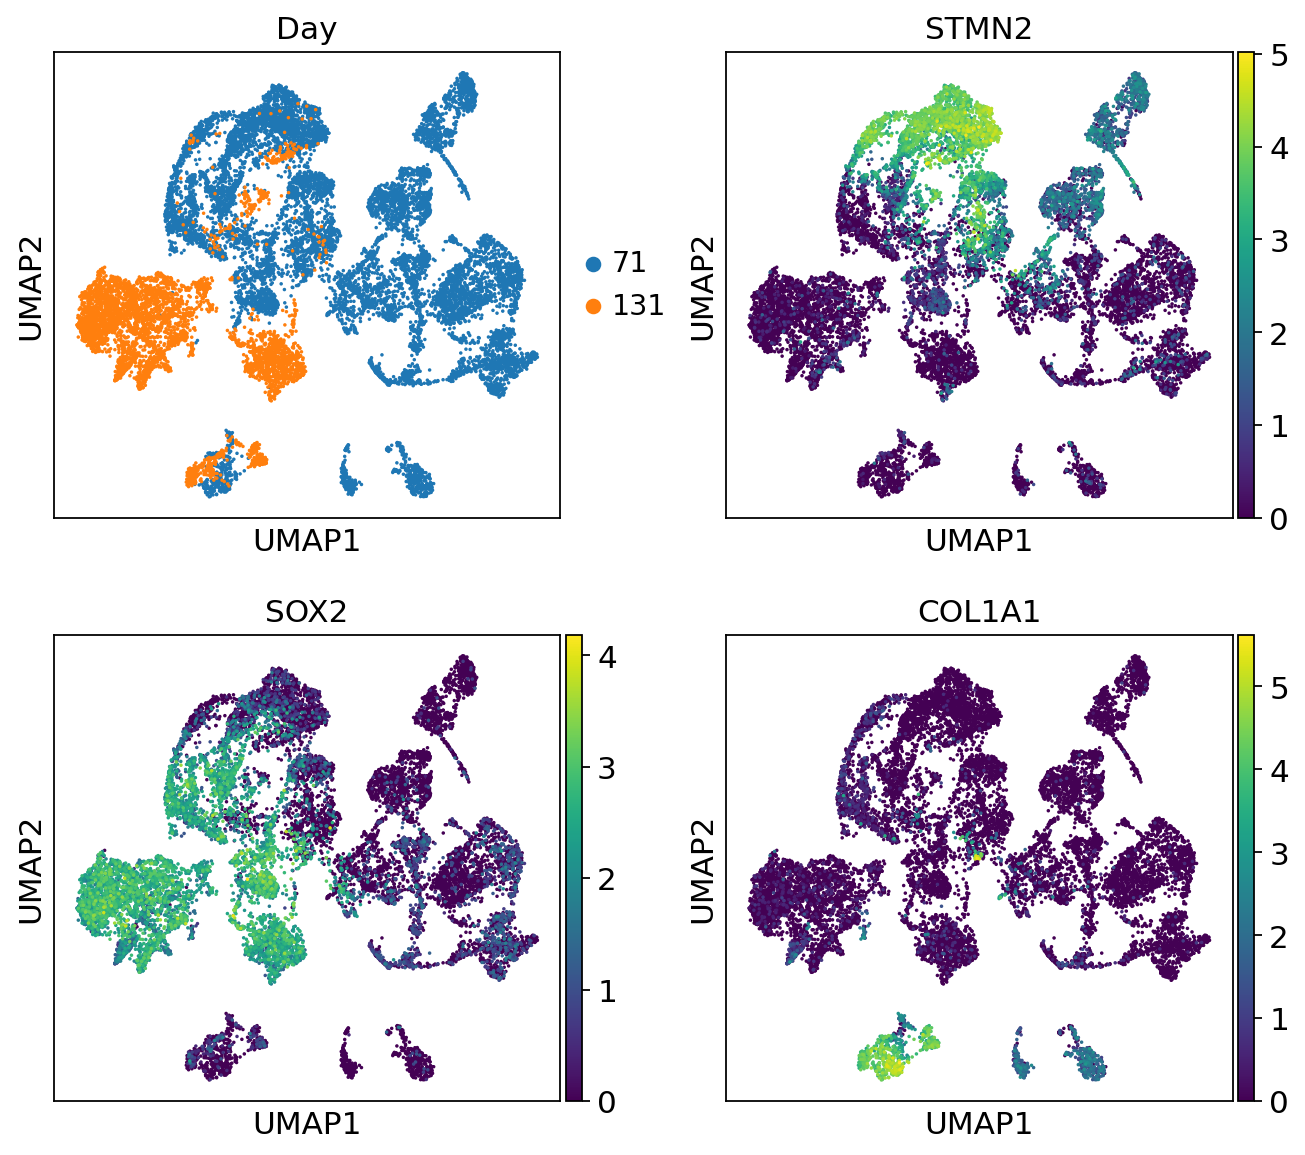

In [46]:
sc.pl.umap(adata, color=["Day","STMN2","SOX2","COL1A1"], size=10, ncols=2)

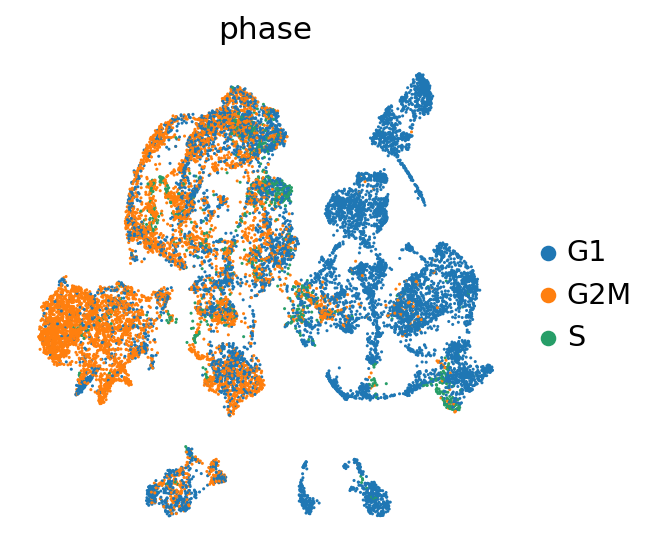

In [47]:
sc.pl.umap(adata, color='phase', frameon=False)

In [48]:
adata.obs = adata.obs.join(snap_annot["assignments"], on="leiden_res_4")

In [49]:
adata.obs["level_2"] = adata.obs["level_2"].fillna(value=adata.obs["level_1"])
adata.obs["level_3"] = adata.obs["level_3"].fillna(value=adata.obs["level_2"])
adata.obs["level_4"] = adata.obs["level_4"].fillna(value=adata.obs["level_3"])
adata.obs["level_5"] = adata.obs["level_5"].fillna(value=adata.obs["level_4"])

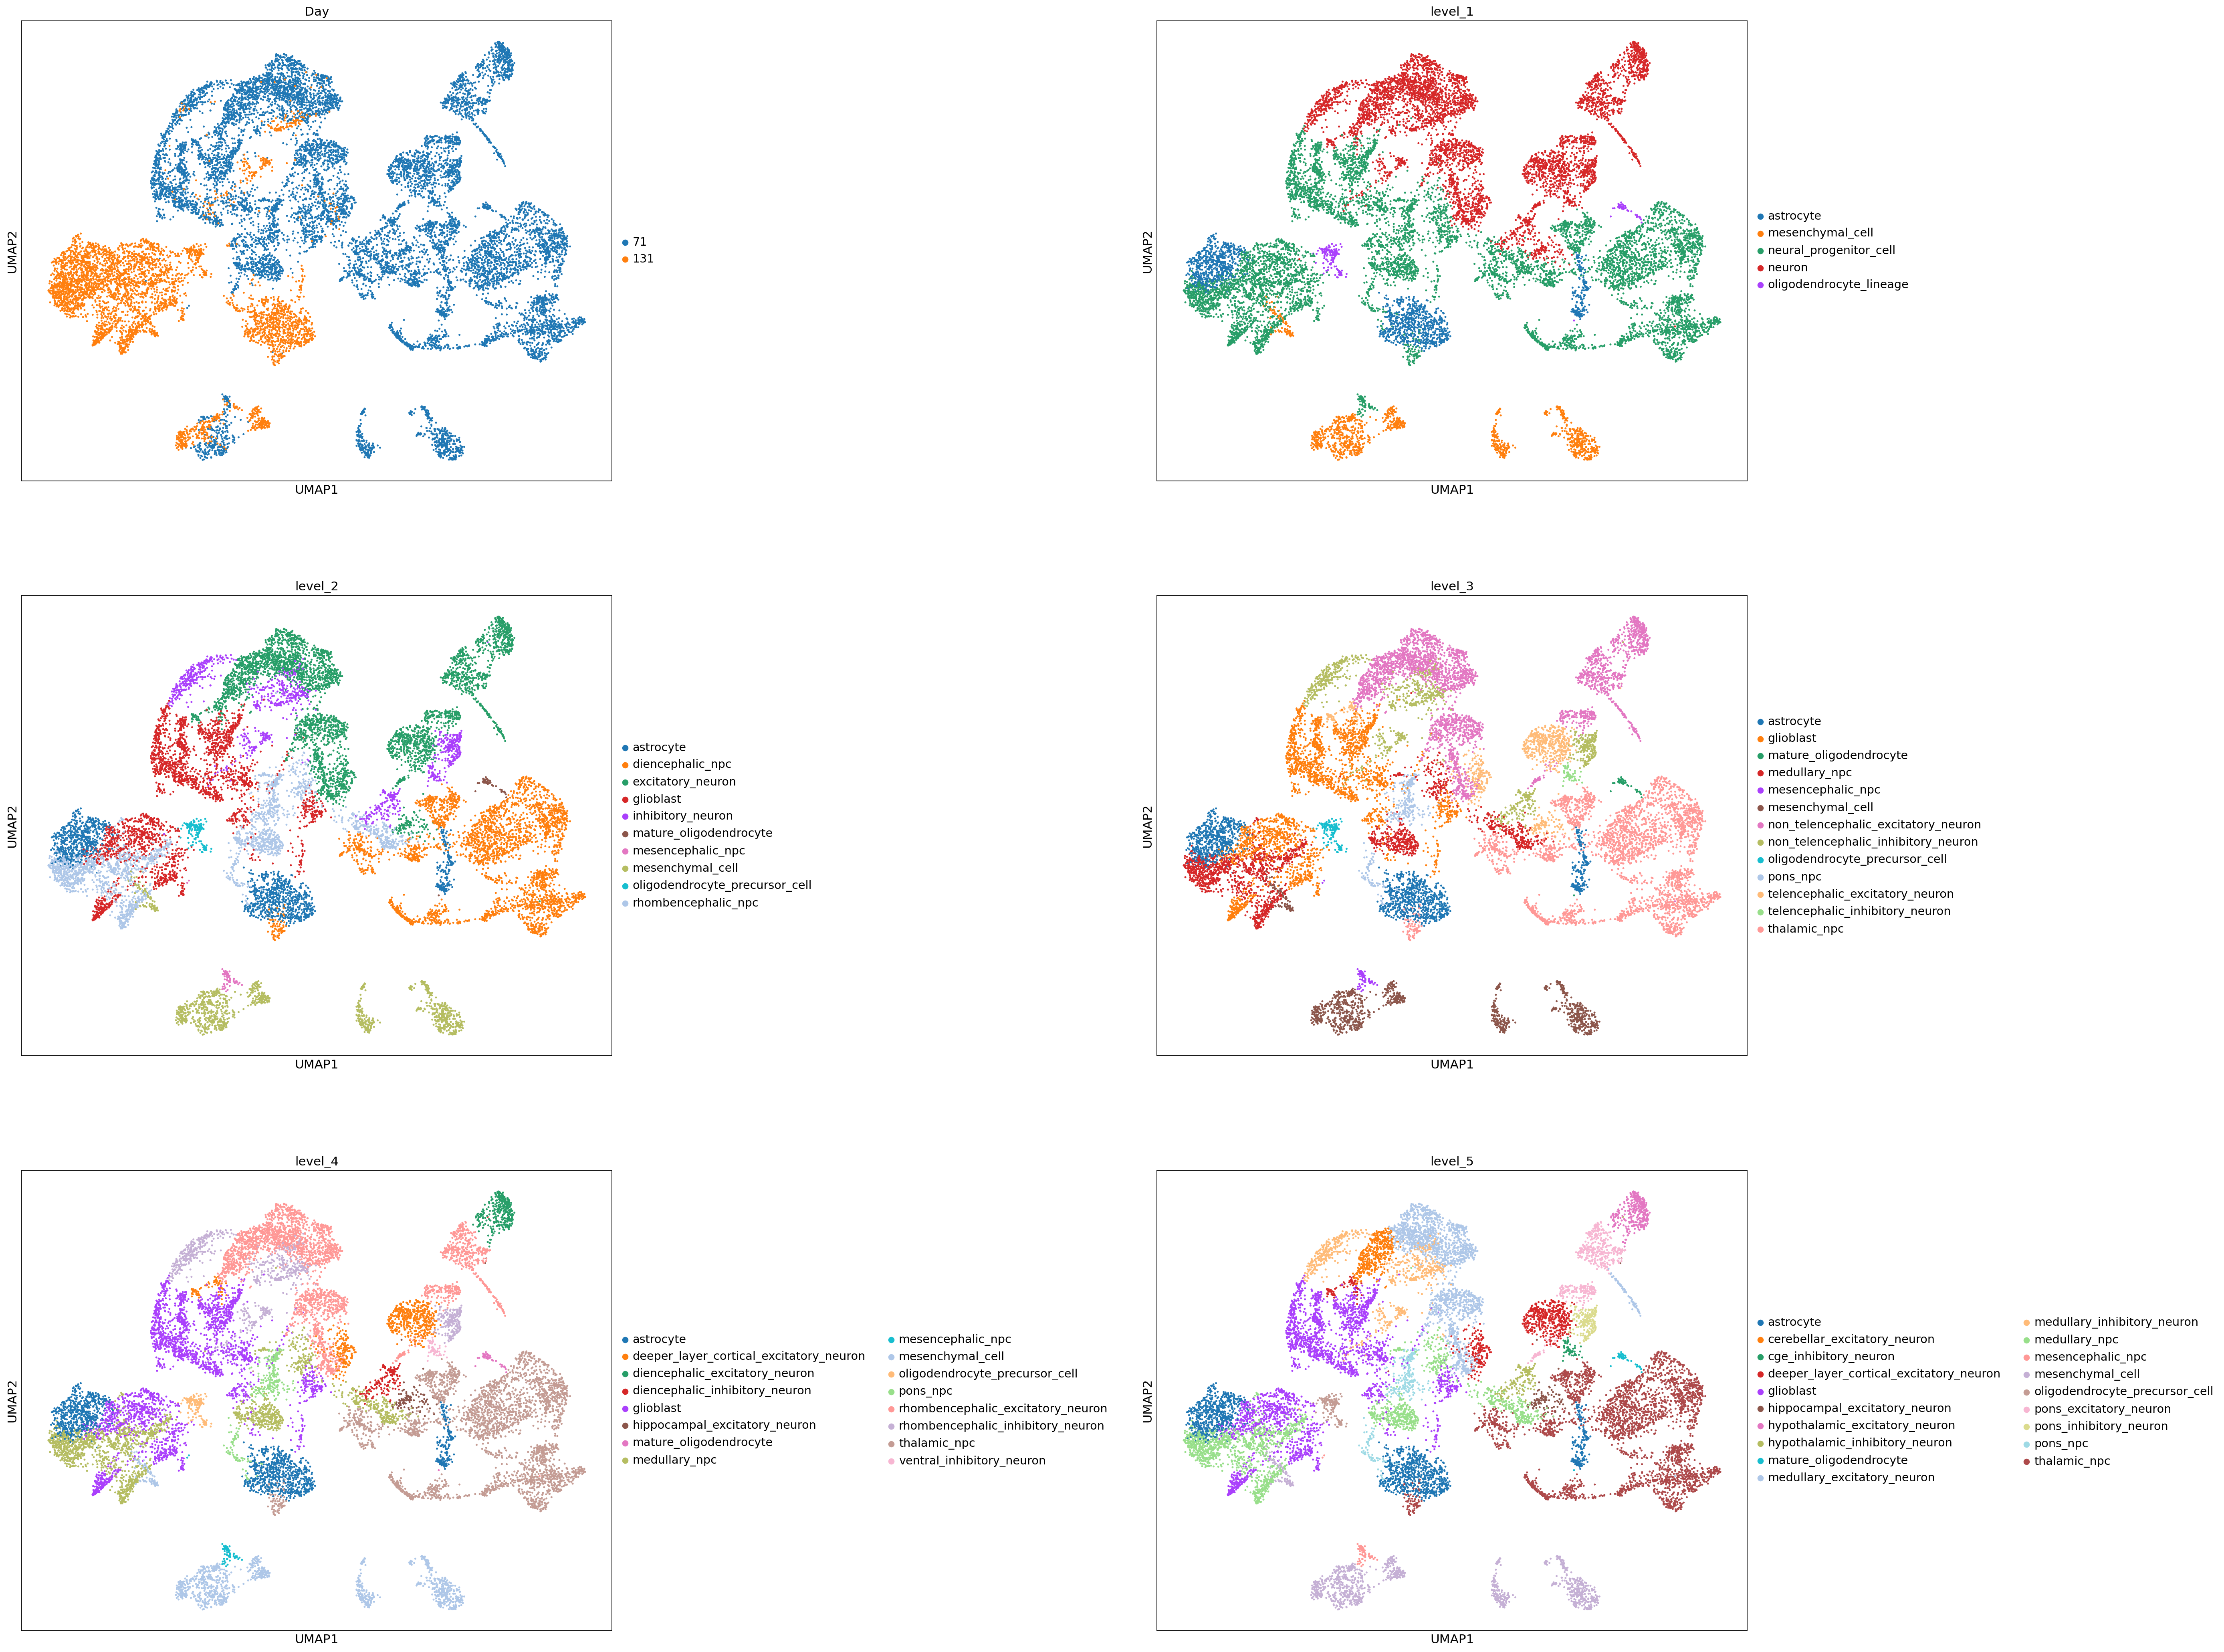

In [50]:
rcParams["figure.figsize"]=(10,10)
sc.pl.umap(adata, color=["Day","level_1","level_2","level_3","level_4","level_5"], ncols=2, wspace=0.75, size=20)

In [51]:
adata.obs.index = adata.obs.index.astype(np.object_)
adata.var.index = adata.var.index.astype(np.object_)

In [52]:
adata.write_h5ad('/hpc/pmc_rios/2.personal/rariese/scseq_analysis/BRO/tumor/data/BRO_tumor/BRO_tumors_snapseed_annot.h5ad')